# Sentiment analysis of women's clothes reviews

## Part 1: Exploratory data analysis 

The project concerns data analysis of women's clothes reviews. The dataset contains the details of clothes reviews such as title, review text, age, rating, etc. It comes from Kaggle.

Attributes:

- Clothing ID (numeric): specific piece being reviewed;
- Age (numeric): reviewers age;
- Title (text): title of the review;
- Review Text (text): review text;
- Rating (numeric): product score granted by the customer from 1 Worst, to 5 Best;
- Recommended IND (numeric): customer recommends the product where 1 is recommended, 0 is not recommended;
- Positive Feedback Count (numeric): number of other customers who found this review positive;
- Division Name (text): name of the product high level division;
- Department Name (text): name of the product department name;
- Class Name (text): name of the product class name.


## Import libriaries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import trim_mean

In [2]:
df = pd.read_csv(r'C:\Python Scripts\Datasets\Womens Clothing Reviews.csv', header=0,index_col=0)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


**First observations**:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


Shape of data:

In [4]:
df.shape

(23486, 10)

Type of variables:

In [5]:
df.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

Example of review text:

In [6]:
df['Review Text'][2]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

Columns:

In [7]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

Checking unique values in each column:

In [8]:
for column in df:
    print(f'Number of unique values in {column}:', df[column].nunique())

Number of unique values in Clothing ID: 1206
Number of unique values in Age: 77
Number of unique values in Title: 13993
Number of unique values in Review Text: 22634
Number of unique values in Rating: 5
Number of unique values in Recommended IND: 2
Number of unique values in Positive Feedback Count: 82
Number of unique values in Division Name: 3
Number of unique values in Department Name: 6
Number of unique values in Class Name: 20


Checking the missing values in data:

In [9]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

The dataset includes information about 23486 women's clothes reviews placed in 10 columns. After first observations one can see that there are missing values. The column names are explicit, so it can easily infer that what one can see in this dataset

## Data cleaning

Drop unnecessary columns and rename of chosen variables:

In [10]:
df_text = df.drop(['Clothing ID', 'Title'], axis=1)

In [11]:
df_text = df_text.rename(columns={"Recommended IND": "Recommended", "Review Text": "Review"})

In [12]:
df_text.head()

,Age,Review,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Delate missing values in 'Review' column:

In [13]:
df_text.dropna(subset=['Review'], inplace=True)

In [14]:
df_text.isnull().sum()

Age                         0
Review                      0
Rating                      0
Recommended                 0
Positive Feedback Count     0
Division Name              13
Department Name            13
Class Name                 13
dtype: int64

In [15]:
df_text.shape

(22641, 8)

## Exploratory data analysis

#### Analysis of individual variables

Unique counts of records for each column:

In [16]:
df_text.nunique()

Age                           77
Review                     22634
Rating                         5
Recommended                    2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

Unique values for individual variables:

In [17]:
df_text['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [18]:
df_text['Department Name'].value_counts()

Department Name
Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: count, dtype: int64

In [19]:
df_text['Division Name'].value_counts()

Division Name
General           13365
General Petite     7837
Initmates          1426
Name: count, dtype: int64

In [20]:
df_text['Rating'].value_counts()

Rating
5    12540
4     4908
3     2823
2     1549
1      821
Name: count, dtype: int64

#### Plots of an individual variables:

**Rating**

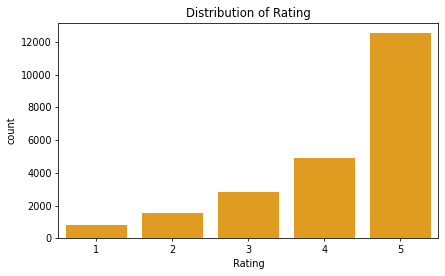

In [21]:
plt.figure(figsize=(7,4), dpi=70)
sns.countplot(x='Rating',data=df_text, color='orange')
plt.title('Distribution of Rating')
plt.show()

The figure shows that the most reviews are positive (rating 5) than negative.

**Department Name**

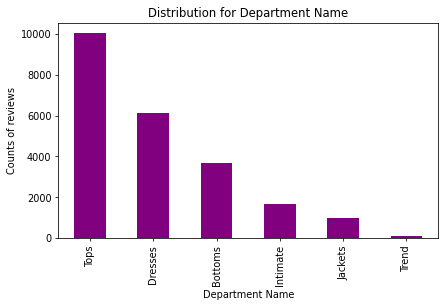

In [22]:
plt.figure(figsize=(7,4), dpi=70)
df_text['Department Name'].value_counts().plot(kind='bar', color='purple')
plt.xlabel("Department Name")
plt.ylabel("Counts of reviews")
plt.title("Distribution for Department Name")
plt.show();

The figure shows that the most reviews products are tops and dresses. 

**Class Name**

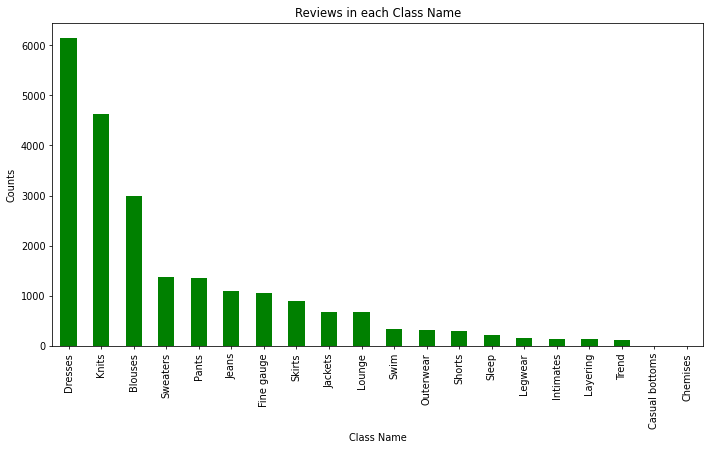

In [23]:
plt.figure(figsize=(12,6), dpi=70)
df_text['Class Name'].value_counts().plot(kind='bar', color='green')
plt.xlabel("Class Name")
plt.ylabel("Counts")
plt.title("Reviews in each Class Name")
plt.show();

The figure shows that the most reviews products are dresses, knits and blouses.

**Division Name**

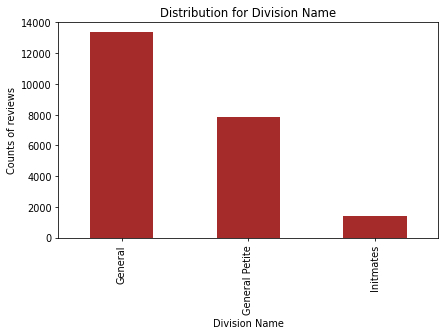

In [24]:
plt.figure(figsize=(7,4), dpi=70)
df_text['Division Name'].value_counts().plot(kind='bar', color='brown')
plt.xlabel("Division Name")
plt.ylabel("Counts of reviews")
plt.title("Distribution for Division Name")
plt.show();

The figure shows that the most reviews comes from General division name.

**Age**

Checking what is the customers' age distribution.

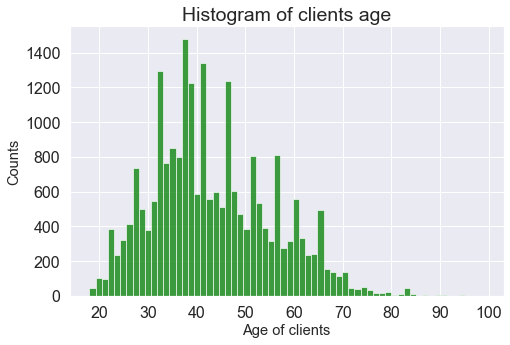

In [68]:
plt.figure(dpi=70, figsize=(8,5))
sns.histplot(df_text.Age, color='green')
plt.xlabel('Age of clients', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Histogram of clients age', fontsize=20)
plt.show();

The above histogram shows that aged between 25-55 are most reviewing age group.

**Positive Feedback Count**

The positive feedback count by each rating:

In [26]:
rating = df_text.groupby('Rating')[['Positive Feedback Count']].count().sort_values('Rating', ascending=False)

<Figure size 448x336 with 0 Axes>

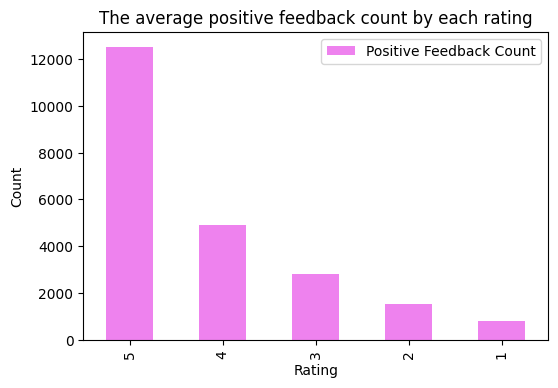

In [27]:
plt.figure(dpi=70)
rating.plot(kind='bar', color='violet', figsize=(6,4))
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("The average positive feedback count by each rating")
plt.show();

In the figure one can see that most products are recommended and has high rating.

**Review_length**

Checking what is the reviews length distribution:

In [28]:
df_text['Review_length'] = df_text['Review'].apply(len)
df_text.head()

,Age,Review,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,Review_length
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


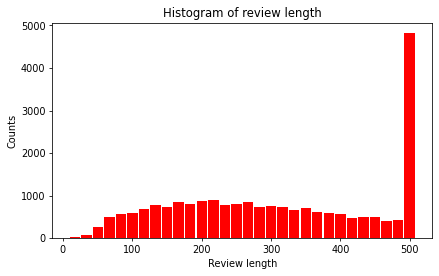

In [29]:
plt.figure(figsize=(7,4), dpi=70)
df_text["Review_length"].plot(bins=30, rwidth=0.9, kind='hist', color="red")
plt.xlabel("Review length")
plt.ylabel("Counts")
plt.title("Histogram of review length")
plt.show();

The figure show that the most reviews length are more than 500 signs.

Average reviews length for each rating:

In [30]:
avg_rating = df_text.groupby('Rating')[['Review_length']].mean().sort_values('Rating', ascending=False)

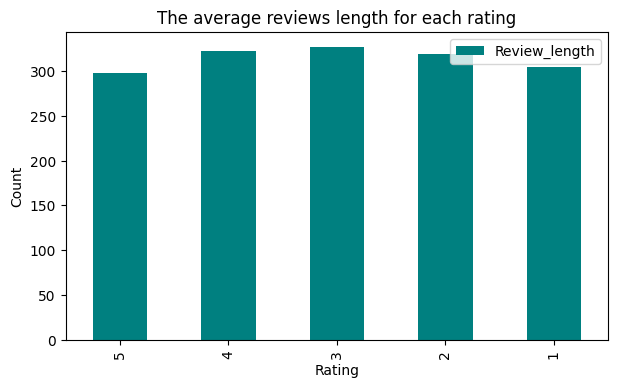

In [31]:
avg_rating.plot(kind='bar', color='teal', figsize=(7,4))
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("The average reviews length for each rating")
plt.show();

The average reviews length is similar for each rating.

### Overview of variables

**Selecting specific data from columns**

Examples of reviews for the worst and the best rating:

In [32]:
df_text.loc[df_text['Rating'] == 1].head(3)

,Age,Review,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,Review_length
61,36,"3 tags sewn in, 2 small (about 1'' long) and 1...",1,0,0,Initmates,Intimate,Intimates,484
85,58,"I was really hoping to like this, but it did n...",1,0,2,General Petite,Tops,Knits,499
96,44,I usually wear a medium and bought a small. it...,1,0,0,General Petite,Tops,Blouses,238


In [33]:
df_text.loc[df_text['Rating'] == 5].head(3)

,Age,Review,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,Review_length
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


More than 5 Positive Feedback Count:

In [34]:
df_text[df_text['Positive Feedback Count'] > 5].head()

,Age,Review,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,Review_length
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192
10,53,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses,336
21,55,"I'm upset because for the price of the dress, ...",4,1,14,General,Dresses,Dresses,500
22,31,"First of all, this is not pullover styling. th...",2,0,7,General,Dresses,Dresses,437
31,46,I never would have given these pants a second ...,5,1,7,General Petite,Bottoms,Pants,344


Rating greater than 4.0 and customers' age greater than 30:

In [35]:
df_text[(df_text['Rating'] > 4.0) & (df_text['Age'] < 30)].head(7)

,Age,Review,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name,Review_length
8,24,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,166
29,28,This sweater is so comfy and classic - it bala...,5,1,0,General,Tops,Sweaters,445
32,21,These pants are even better in person. the onl...,5,1,0,General Petite,Bottoms,Pants,93
42,23,This poncho is so cute i love the plaid check ...,5,1,0,General,Tops,Fine gauge,239
62,28,I recently got this on sale after looking at i...,5,1,0,General,Tops,Knits,201
72,27,I have a short torso and this works well for m...,5,1,4,General,Tops,Blouses,500
91,29,This top is so much prettier in real life than...,5,1,5,General Petite,Tops,Blouses,401


How many products have rating above 4?

In [36]:
print(df_text['Class Name'].where(df['Rating'] > 4).count())

12527


How many products have rating below 3?

In [37]:
print(df_text['Class Name'].where(df['Rating'] < 3).count())

2370


Number of reviewes products according to the rating, max, minimum, mean and sum:

In [38]:
df_text.groupby('Class Name')['Rating'].agg(['max', 'min', 'mean', 'sum'])

,max,min,mean,sum
Class Name,,,,
Blouses,5,1,4.142809,12358
Casual bottoms,4,4,4.000000,4
Chemises,4,4,4.000000,4
Dresses,5,1,4.138812,25433
Fine gauge,5,1,4.237960,4488
Intimates,5,1,4.278912,629
Jackets,5,1,4.288433,2929
Jeans,5,1,4.347826,4800
Knits,5,1,4.145698,19178


Sum of positive feedback count according to the rating: 

In [39]:
df_text.groupby('Rating')['Positive Feedback Count'].count().sort_values(ascending=False)

Rating
5    12540
4     4908
3     2823
2     1549
1      821
Name: Positive Feedback Count, dtype: int64

Number of positive feedback count according to the rating; max , minimum, mean and sum:

In [40]:
df_text.groupby('Rating')['Positive Feedback Count'].agg(['max', 'min', 'mean', 'sum'])

,max,min,mean,sum
Rating,,,,
1,108,0,3.548112,2913
2,65,0,3.360232,5205
3,122,0,3.198725,9030
4,95,0,2.488386,12213
5,117,0,2.408134,30198


Maximum and minimum customers age according to the rating:

In [41]:
df_text.groupby('Rating')['Age'].agg(['max', 'min', 'mean'])

,max,min,mean
Rating,,,
1,94,19,43.710110
2,91,19,42.609425
3,91,19,42.163301
4,99,18,43.012225
5,99,18,43.691547


**Overview of recommended variable: positive and negative reviews**

In [43]:
df_text['Recommended'].unique()

array([1, 0])

The counts of unique values:

In [44]:
df_text['Recommended'].value_counts()

Recommended
1    18540
0     4101
Name: count, dtype: int64

In [45]:
df_text.groupby(['Rating', 'Recommended'])['Recommended'].count()

Rating  Recommended
1       0                806
        1                 15
2       0               1455
        1                 94
3       0               1653
        1               1170
4       0                164
        1               4744
5       0                 23
        1              12517
Name: Recommended, dtype: int64

The average of reviews length in recommended variable:

In [46]:
df_text.groupby('Recommended')[['Review_length']].mean()

,Review_length
Recommended,
0,318.334065
1,306.554207


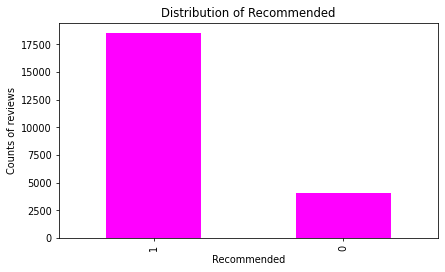

In [47]:
plt.figure(figsize=(7,4), dpi=70)
df_text["Recommended"].value_counts().plot(kind='bar', color='magenta')
plt.xlabel("Recommended")
plt.ylabel("Counts of reviews")
plt.title("Distribution of Recommended")
plt.show();

The target value is imbalanced, there are more positive reviews than negative. 

## Summary statistic

The mean of positive feedback count and customers age:

In [48]:
print(df_text['Positive Feedback Count'].mean().round(2))

2.63


In [49]:
print(df_text['Age'].mean().round(0))

43.0


**Trimmed mean**:
mean after discarding top and bottom 10 % values eliminating outliers.

Trimmed mean for positive feedback count and customers age:

In [50]:
positive_TM = trim_mean(df_text['Positive Feedback Count'], 0.1).round(2)
print ("Positive feedback trimmed mean: ", positive_TM) 
  
age_TM = trim_mean(df_text.Age, 0.1).round(2)
print ("\nCustomers age trimmed mean: ", age_TM) 

Positive feedback trimmed mean:  1.37

Customers age trimmed mean:  42.63


**Weighted Mean**

Positive Feedback Count rate is weighed as per the customers age:

In [51]:
positive_WM = np.average(df_text['Positive Feedback Count'], weights = df_text.Age).round(2)
print ("Weighted Positive feedback Mean: ", positive_WM) 


Weighted Positive feedback Mean:  2.7


**Median**

Median for positive feedback count and customers age:

In [52]:
Positive_Feedback_median = df_text['Positive Feedback Count'].median() 
print ("Positive feedback count median : ", Positive_Feedback_median) 
  
Age_median = df_text.Age.median() 
print ("\nCustomers age median : ", Age_median) 

Positive feedback count median :  1.0

Customers age median :  41.0


#### Descriptive Statistics for numeric columns:

In [53]:
df_text.describe()

,Age,Rating,Recommended,Positive Feedback Count,Review_length
count,22641.000000,22641.000000,22641.000000,22641.000000,22641.000000
mean,43.280376,4.183561,0.818868,2.630582,308.687911
std,12.326980,1.115762,0.385136,5.786164,143.940048
min,18.000000,1.000000,0.000000,0.000000,9.000000
25%,34.000000,4.000000,1.000000,0.000000,186.000000
50%,41.000000,5.000000,1.000000,1.000000,301.000000
75%,52.000000,5.000000,1.000000,3.000000,459.000000
max,99.000000,5.000000,1.000000,122.000000,508.000000


**Skewed distribution:**

In [54]:
df2 = df_text[['Rating', 'Recommended', 'Positive Feedback Count', 'Age', 'Review_length']]
df2.head()

,Rating,Recommended,Positive Feedback Count,Age,Review_length
0,4,1,0,33,53
1,5,1,4,34,303
2,3,0,0,60,500
3,5,1,0,50,124
4,5,1,6,47,192


In [55]:
df2.skew()

Rating                    -1.288056
Recommended               -1.656022
Positive Feedback Count    6.380592
Age                        0.515729
Review_length             -0.042663
dtype: float64

For the Age variable there are symmetric distribution, for Rating and Recommended left skewed distribution (average smaller than median) and Positive Fedback Count is a right-skewed distribution (average grather than median).

**Correlation:**

In [56]:
corr = df2.corr()
corr

,Rating,Recommended,Positive Feedback Count,Age,Review_length
Rating,1.000000,0.792568,-0.060984,0.029962,-0.056199
Recommended,0.792568,1.000000,-0.065923,0.034208,-0.031519
Positive Feedback Count,-0.060984,-0.065923,1.000000,0.040850,0.191195
Age,0.029962,0.034208,0.040850,1.000000,0.014931
Review_length,-0.056199,-0.031519,0.191195,0.014931,1.000000


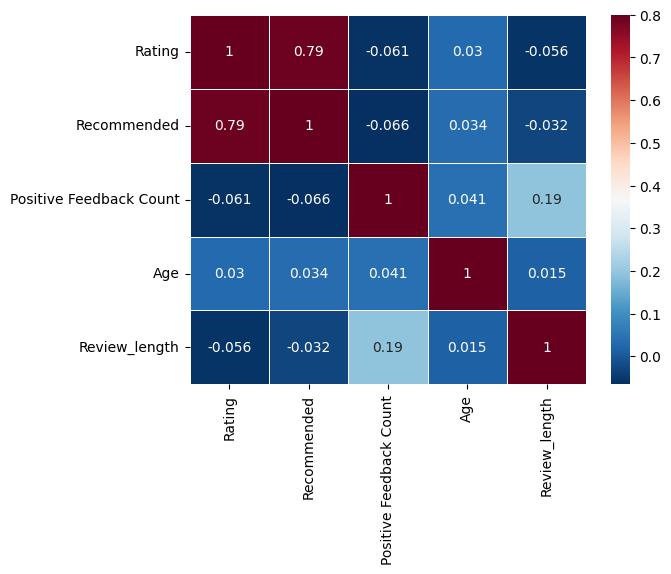

In [57]:
ax=sns.heatmap(corr, annot=True, linewidth=0.5, cmap='RdBu_r', vmax=.8)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))
plt.show()

In the above figure one can see that the variables are strongly correlated with themselves and strong relationship found between Rating and Recommended variables.

## Outlier Identification

In [58]:
df2.head()

,Rating,Recommended,Positive Feedback Count,Age,Review_length
0,4,1,0,33,53
1,5,1,4,34,303
2,3,0,0,60,500
3,5,1,0,50,124
4,5,1,6,47,192


In [59]:
data = df_text[['Rating', 'Recommended', 'Positive Feedback Count', 'Age', 'Review_length']]
data.head()

,Rating,Recommended,Positive Feedback Count,Age,Review_length
0,4,1,0,33,53
1,5,1,4,34,303
2,3,0,0,60,500
3,5,1,0,50,124
4,5,1,6,47,192


##### Box plot for outlier detection

The box plot is a  way of displaying the distribution of data based on the five-number summary (minimum, first quartile (Q1), median, third quartile (Q3), and maximum). It is frequently used to identify data distribution and detect outliers. 

Below the box plots of the variables Age, Positive Feedback Count and Rating:

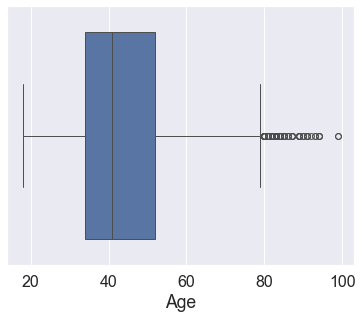

In [60]:
plt.figure(dpi = 70)
sns.set(font_scale=1.5)
sns.boxplot(x=df2['Age'])
plt.show()

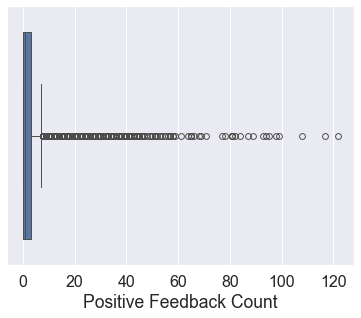

In [61]:
plt.figure(dpi = 70)
sns.set(font_scale=1.5)
sns.boxplot(x=df2['Positive Feedback Count'])
plt.show()

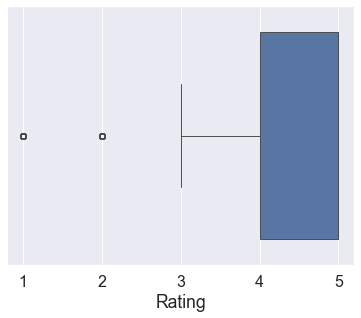

In [62]:
plt.figure(dpi = 70)
sns.set(font_scale=1.5)
sns.boxplot(x=df2['Rating'])
plt.show()

##### Identifying Outliers with Interquartile Range(IQR):

The interquartile range (IQR) is a measure of statistical dispersion and is calculated as the difference between the 75th and 25th percentiles. One can describe it by the formula IQR = Q3 − Q1. 

In [63]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3-Q1 
print(IQR)

Rating                       1.0
Recommended                  0.0
Positive Feedback Count      3.0
Age                         18.0
Review_length              273.0
dtype: float64


One can determine outliers based on IQR results. The 'False' value means that the values are correct, while value is 'True' means the presence of an outlier:

In [64]:
outliers_filter = (df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))
outliers_filter.head(20)

,Rating,Recommended,Positive Feedback Count,Age,Review_length
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,True,True,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [65]:
no_outlier_filter = ~(outliers_filter).any(axis=1)
no_outlier_filter

0         True
1         True
2        False
3         True
4         True
         ...  
23481     True
23482     True
23483    False
23484     True
23485    False
Length: 22641, dtype: bool

In [66]:
no_outlier_filter.value_counts()


True     16747
False     5894
Name: count, dtype: int64

#### IQR Score

In this method I have used the IQR scores calculated earlier to remove outliers. The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier and can be removed.

The shape of this data comes 16747 observations of 5 variables. In this case a lot of records will be deleted by the using the IQR method. 

In [67]:
data_out = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data_out.shape)

(16747, 5)


## Summary

This project was aimed to exploratory data analysis of women's clothes reviews. I have analyzed and plots of individual variables and counted the summary statistics such as mean, trimmed mean, weighted mean and median. I have also determined skewed distribution and correlation as well.  At the end the outliers identification I have beed established.
